Figure 1: Demonstration of uncertainties with synthetic data

In [1]:
import importlib
import xarray as xr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import constraint_utils as constraint

import warnings
warnings.filterwarnings('ignore')

importlib.reload(linfit)

<module 'ecpaper_utils.linfit_utils' from '/home/islas/python/ecpaper2020/ecpaper_utils/linfit_utils.py'>

In [2]:
sigmaobs=1.2

npoints=30
rxy=np.zeros([npoints]) ; rxy[:]=0.1
a=10 ; b=2
xvals=np.arange(0,npoints,1)
yvals=a +b*xvals[:]
iv = np.random.normal(0,10,npoints)
yvals[:] = yvals[:]+iv[:]

stdevx = np.random.uniform(0,1,npoints)+0.45
stdevy = stdevx*3.5

obs=np.zeros([4])
obs[0]=5 ; obs[1]=4.5 ; obs[2]=5.7 ; obs[3]=6.2

aols, bols=linfit.linfit_xy(xvals, yvals, sigma=stdevy)
atls, btls=linfit.tls(xvals, yvals, stdevx, stdevy)
abhmall5, bbhmall5, del2all5, muxall5, delx2all5 = linfit.bhm(xvals, yvals, stdevx, stdevy, rxy, iseed=3 )
abhm = np.mean(abhmall5) ; bbhm = np.mean(bbhmall5)

In [3]:
olsconstraint, olssamples = constraint.dotheconstraint(xvals, yvals, xvals, yvals, obs, sigyem=stdevy, sigxem=stdevx, sigx1mem=stdevx[0], sigy1mem=stdevy[0], 
                                                       method='OLS', outputsamples=True)
tlsconstraint, tlssamples = constraint.dotheconstraint(xvals, yvals, xvals, yvals, obs, sigyem=stdevy, sigxem=stdevx, sigx1mem=stdevx[0], 
                                                       sigy1mem=stdevy[0], method='OLS', outputsamples=True)
bhmconstraint, bhmsamples = constraint.dotheconstraint(xvals, yvals, xvals, yvals, obs, sigyem=stdevy, sigxem=stdevx, sigx1mem=stdevx[0], 
                                                       sigy1mem=stdevy[0], method='BHM', rxyem=rxy, rxy1mem=rxy[0], outputsamples=True)

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [4]:
bins=np.arange(-21,90,1)
histols, binedgesconstrain = np.histogram(olssamples, bins=bins)
histols = (histols/np.size(olssamples))*100.
histtls, binedgesconstrain = np.histogram(tlssamples, bins=bins)
histtls = (histtls/np.size(tlssamples))*100.
histbhm, binedgesconstrain = np.histogram(bhmsamples, bins=bins)
histbhm = (histbhm/np.size(bhmsamples))*100.

0
1
2
3


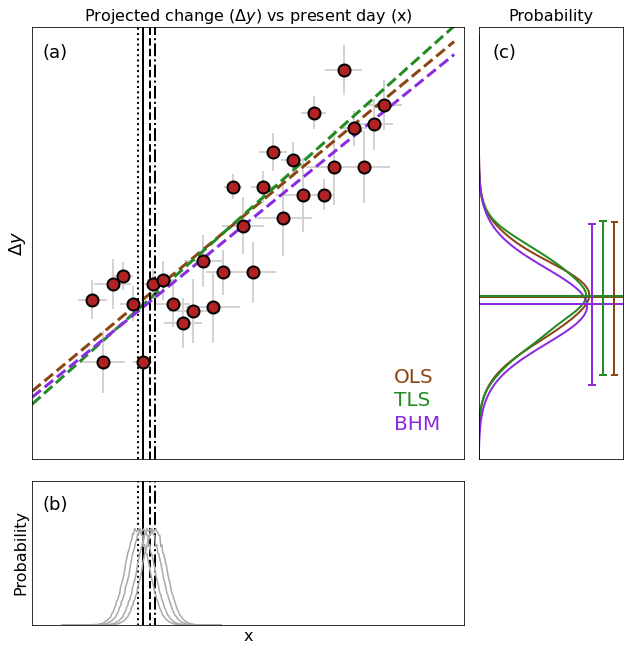

In [6]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax1 = fig.add_axes(np.array([0.05,0.35,0.6,0.6]))
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_xlim(-6,37)
ax1.set_ylim(-21,90)
ax1.set_ylabel('$\Delta y$', fontsize=18)
#ax1.set_xlabel('x', fontsize=16)
ax1.set_title('Projected change ($\Delta y$) vs present day (x)', fontsize=16)

x4line=np.arange(-6,37,1)
ax1.plot(x4line,aols+bols*x4line, color='saddlebrown', linewidth=3, linestyle='dashed')
ax1.plot(x4line,atls+btls*x4line, color='forestgreen', linewidth=3, linestyle='dashed')
ax1.plot(x4line,abhm+bbhm*x4line, color='blueviolet', linewidth=3, linestyle='dashed')

ax1.text(30, 0, 'OLS', verticalalignment='center', horizontalalignment='left', color='saddlebrown', fontsize=20)
ax1.text(30,-6, 'TLS', verticalalignment='center', horizontalalignment='left', color='forestgreen', fontsize=20)
ax1.text(30,-12, 'BHM', verticalalignment='center', horizontalalignment='left', color='blueviolet', fontsize=20)

ax1.plot([obs[0], obs[0]],[-21,90], color="black", linewidth=2)
ax1.plot([obs[1], obs[1]],[-21,90], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obs[2], obs[2]],[-21,90], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obs[3], obs[3]],[-21,90],color="black", linestyle='dashdot', linewidth=2)

ax1.plot(xvals,yvals,"o",markerfacecolor='firebrick', markeredgecolor='black', markersize=12, markeredgewidth=2)
ax1.errorbar(xvals,yvals,1.96*stdevy,1.96*stdevx, linestyle="None", color='lightgray', linewidth=2)
ax1.text(-5,82,'(a)', fontsize=18)

ax2 = fig.add_axes(np.array([0.05,0.12,0.6,0.2]))
ax2.set_xlim(-6,37)
ax2.set_ylim(0,5)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel('Probability', fontsize=16)
ax2.set_xlabel('x', fontsize=16)
ax2.plot([obs[0], obs[0]],[-21,90], color="black", linewidth=2)
ax2.plot([obs[1], obs[1]],[-21,90], color="black", linestyle='dotted', linewidth=2)
ax2.plot([obs[2], obs[2]],[-21,90], color="black", linestyle='dashed', linewidth=2)
ax2.plot([obs[3], obs[3]],[-21,90],color="black", linestyle='dashdot', linewidth=2)
ax2.text(-5,4,'(b)', fontsize=18)

obssample=np.random.normal(0,1,100000)*sigmaobs
bins=np.arange(-3,13,0.1)
for iobs in range(0,len(obs),1):
    print(iobs)
    histoobs, binedges = np.histogram(obssample[:]+obs[iobs], bins=bins)
    histoobs = (histoobs/np.size(obssample))*100.
    ax2.plot(binedges[0:np.size(binedges)-1],histoobs, color='darkgray')

ax3 = fig.add_axes(np.array([0.67,0.35,0.2,0.6]))
ax3.set_ylim(-21,90)
ax3.set_xlim(0,5.2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Probability', fontsize=16)
ax3.text(0.5,82,'(c)', fontsize=18)
bins=np.arange(-21,90,1)
ax3.plot(histols, binedgesconstrain[0:np.size(binedgesconstrain)-1], color='saddlebrown', linewidth=2)
ax3.plot(histtls, binedgesconstrain[0:np.size(binedgesconstrain)-1], color='forestgreen', linewidth=2)
ax3.plot(histbhm, binedgesconstrain[0:np.size(binedgesconstrain)-1], color='blueviolet', linewidth=2)

ax3.plot([0,5.2],[olsconstraint['meanwithiv'],olsconstraint['meanwithiv']], color='saddlebrown',linewidth=2)
ax3.plot([0,5.2],[tlsconstraint['meanwithiv'],tlsconstraint['meanwithiv']], color='forestgreen',linewidth=2)
ax3.plot([0,5.2],[bhmconstraint['meanwithiv'],bhmconstraint['meanwithiv']], color='blueviolet',linewidth=2)

ax3.plot([4.9,4.9],[olsconstraint['min95withiv'], olsconstraint['max95withiv']], color='saddlebrown',linewidth=2)
ax3.plot([4.8,5], [olsconstraint['min95withiv'], olsconstraint['min95withiv']], color='saddlebrown', linewidth=2)
ax3.plot([4.8,5], [olsconstraint['max95withiv'], olsconstraint['max95withiv']], color='saddlebrown', linewidth=2)

ax3.plot([4.5,4.5],[tlsconstraint['min95withiv'], tlsconstraint['max95withiv']], color='forestgreen', linewidth=2)
ax3.plot([4.4,4.6], [tlsconstraint['min95withiv'], tlsconstraint['min95withiv']], color='forestgreen', linewidth=2)
ax3.plot([4.4,4.6], [tlsconstraint['max95withiv'], tlsconstraint['max95withiv']], color='forestgreen', linewidth=2)

ax3.plot([4.1,4.1],[bhmconstraint['min95withiv'], bhmconstraint['max95withiv']], color='blueviolet', linewidth=2)
ax3.plot([4.0,4.2], [bhmconstraint['min95withiv'], bhmconstraint['min95withiv']], color='blueviolet', linewidth=2)
ax3.plot([4.0,4.2], [bhmconstraint['max95withiv'], bhmconstraint['max95withiv']], color='blueviolet', linewidth=2)

fig.patch.set_facecolor('white')
fig.savefig('fig1.pdf', facecolor='white', bbox_inches='tight')